<a href="https://colab.research.google.com/github/Aryan0610/OnlineBookRecommendation/blob/main/Book_recommendation_colab_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Load the Dataset

In [ ]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exploratory Data Analysis:
1.Descriptive Statistics

In [ ]:
users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596611 entries, 0 to 596610
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      596611 non-null  int64  
 1   ISBN         596611 non-null  object 
 2   Book-Rating  596610 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.7+ MB


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,596611.000000,596610.000000
mean,75214.306320,3.016619
std,48620.669592,3.903379
min,2.000000,0.000000
25%,35859.000000,0.000000
50%,73479.000000,0.000000
75%,109955.000000,7.000000
max,278854.000000,10.000000


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43354 entries, 0 to 43353
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 43354 non-null  object
 1   Book-Title           43354 non-null  object
 2   Book-Author          43354 non-null  object
 3   Year-Of-Publication  43354 non-null  int64 
 4   Publisher            43354 non-null  object
 5   Image-URL-S          43354 non-null  object
 6   Image-URL-M          43354 non-null  object
 7   Image-URL-L          43354 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


In [ ]:
books.describe()

,Year-Of-Publication
count,43354.000000
mean,1960.036675
std,260.348887
min,0.000000
25%,1990.000000
50%,1996.000000
75%,2000.000000
max,2030.000000


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(43354, 8)
(596611, 3)
(278858, 3)


In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

In [ ]:
books.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

2. Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

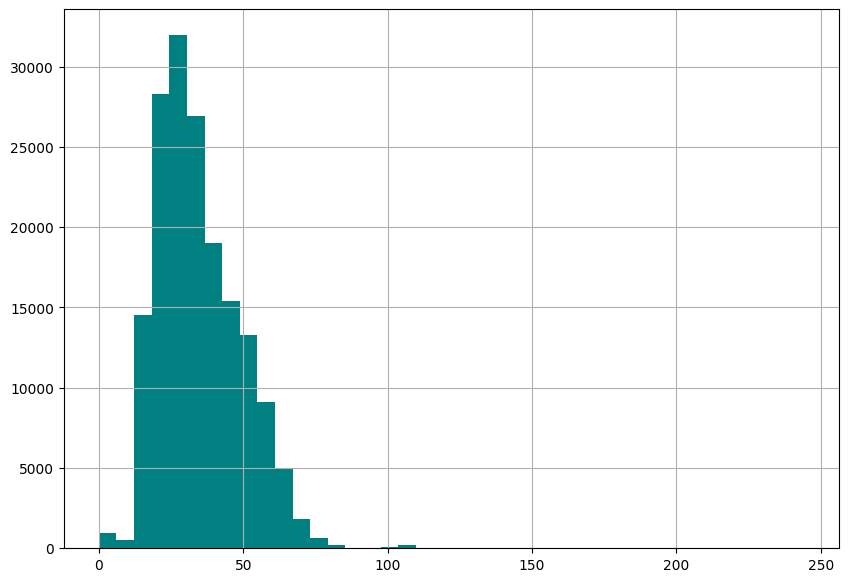

In [ ]:
plt.figure(figsize=(10,7))
users.Age.hist(bins=40, color='teal')
#Age column has some invalid entries like nan, 0 and very high values like 100 and above

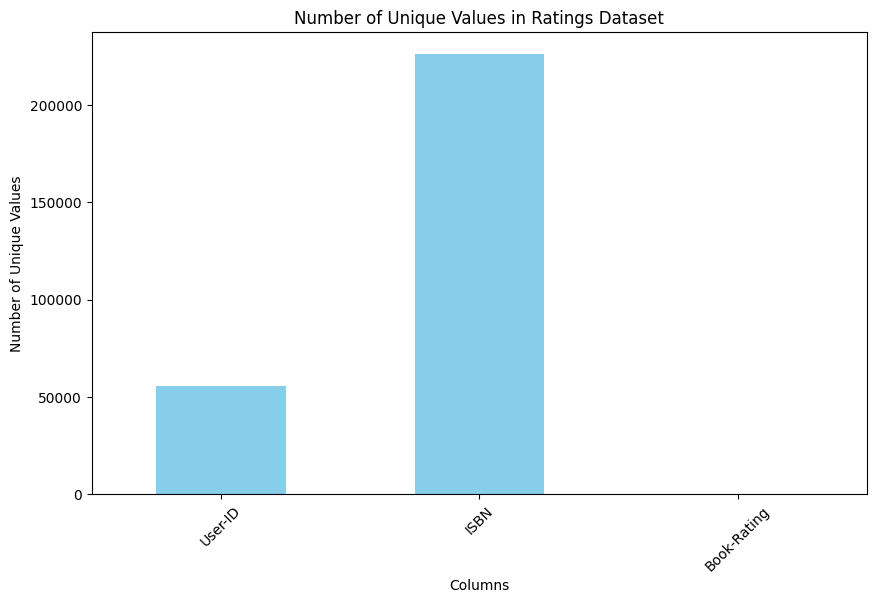

In [ ]:
# Calculate the number of unique values in each column of the ratings dataset
unique_counts = ratings.nunique()

# Plot bar plot
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Ratings Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()


Number of unique book ratings: 11


<ipython-input-35-455a436cdae8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='Book-Rating', palette='viridis')


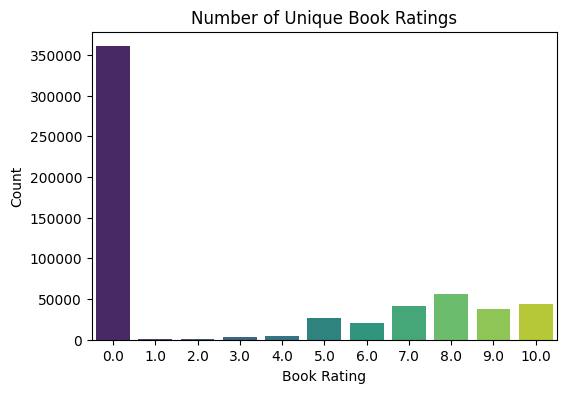

In [ ]:
# Calculate the number of unique book ratings
unique_ratings_count = ratings['Book-Rating'].nunique()

print("Number of unique book ratings:", unique_ratings_count)
# Plot bar plot for number of unique book ratings
plt.figure(figsize=(6, 4))
sns.countplot(data=ratings, x='Book-Rating', palette='viridis')
plt.title('Number of Unique Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
ratings['Book-Rating'].unique()

array([ 0.,  5.,  3.,  6.,  8.,  7., 10.,  9.,  4.,  1.,  2., nan])

In [ ]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

ratings.shape,ratings_new.shape
#it can be seen that many rows having book ISBN not part of books dataset got dropped off

((596611, 3), (300795, 3))

In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

(300795, 3)
(119530, 3)
(181265, 3)


<ipython-input-39-a41dffe13a65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')


<Axes: xlabel='Book-Rating', ylabel='count'>

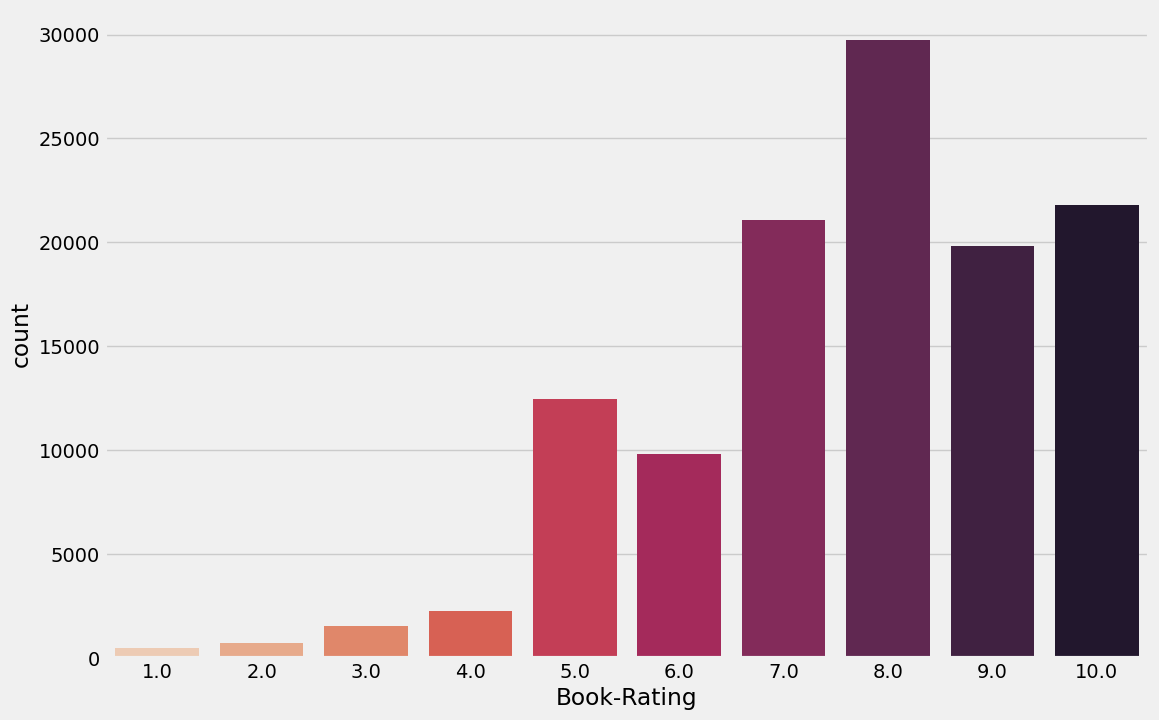

In [ ]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

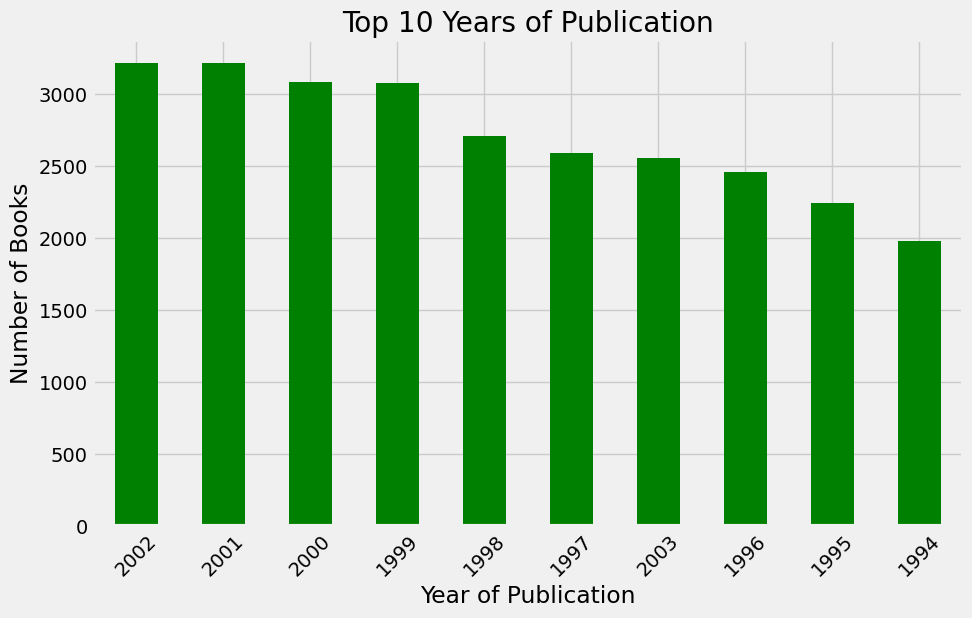

In [ ]:
# Get the top 10 years of publication
top_years = books['Year-Of-Publication'].value_counts().head(10)

# Plot bar plot for top 10 years of publication
plt.figure(figsize=(10, 6))
top_years.plot(kind='bar', color='green')
plt.title('Top 10 Years of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


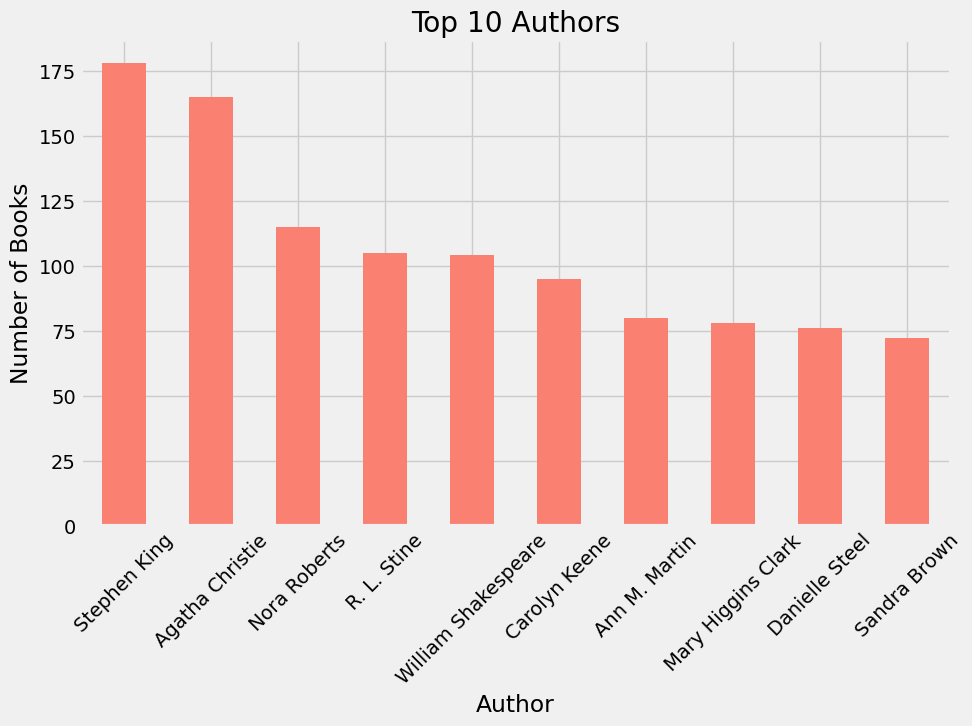

In [ ]:
# Get the top 10 authors
top_authors = books['Book-Author'].value_counts().head(10)

# Plot bar plot for top 10 authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='salmon')
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


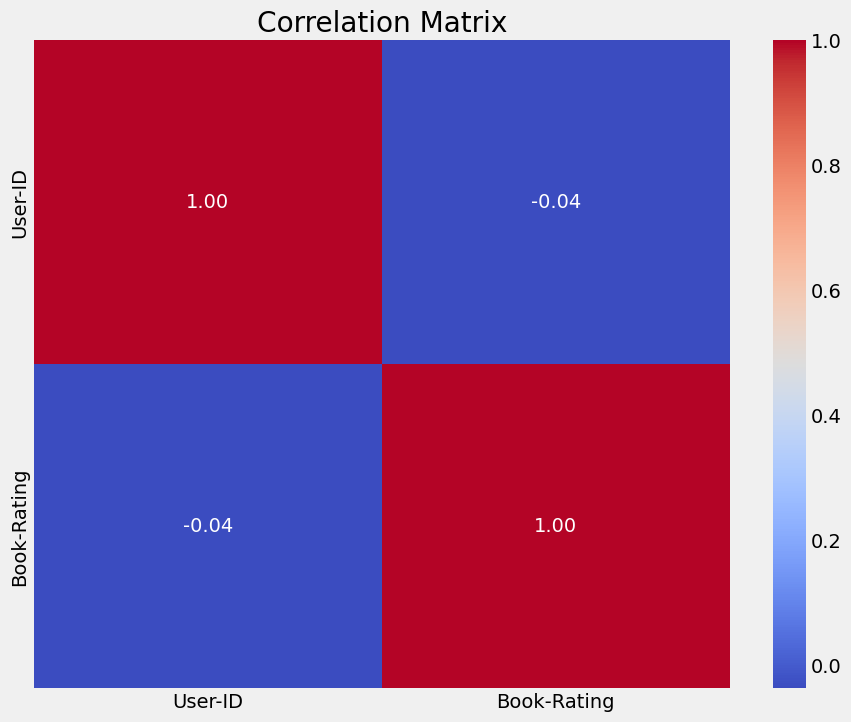

In [ ]:
# Merge ratings dataset with books dataset to get book titles
merged_ratings = pd.merge(ratings, books[['ISBN', 'Book-Title']], on='ISBN', how='left')

# Exclude non-numeric columns
numeric_columns = merged_ratings.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = merged_ratings[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


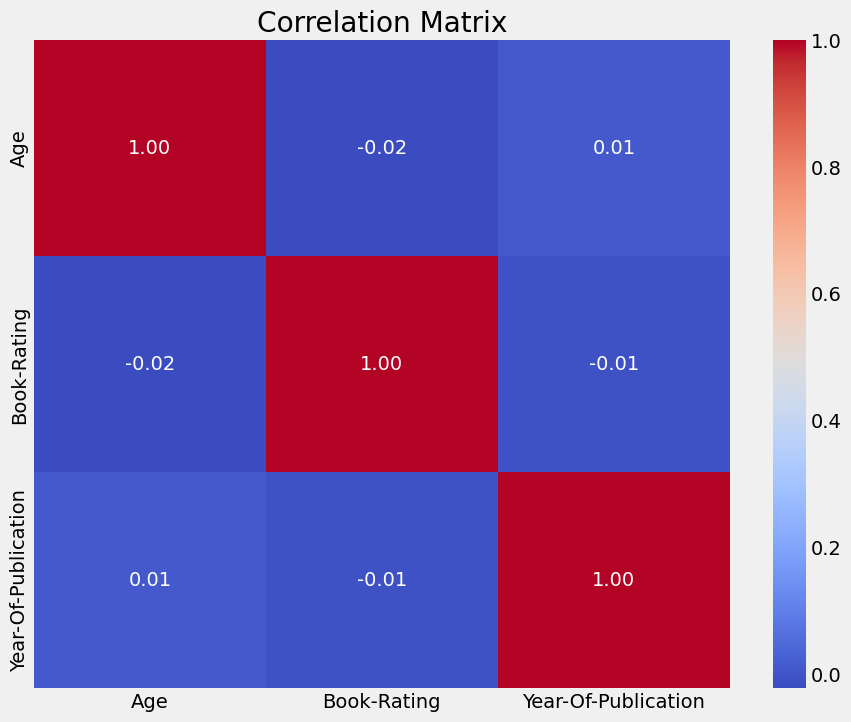

In [ ]:
# Merge all three datasets
merged_data = pd.merge(ratings, books, on='ISBN', how='left')
merged_data = pd.merge(merged_data, users, on='User-ID', how='left')

# Select numeric columns for correlation
#numeric_columns = ['Age', 'Book-Rating', 'Year-Of-Publication']

# Check if a particular value is present in a specific column
#value_to_check = 'DK Publishing Inc'
#column_to_check = 'Year-Of-Publication'

# Method 1: Using boolean indexing
#is_present = merged_data[column_to_check].eq(value_to_check).any()

# Method 2: Using 'in' operator
#is_present = value_to_check in merged_data[column_to_check].values

# Print the result
#print(f"Is '{value_to_check}' present in '{column_to_check}': {is_present}")
# Select numeric columns for correlation
numeric_columns = ['Age', 'Book-Rating', 'Year-Of-Publication']

# Convert 'Year-Of-Publication' to numeric (if it's not already)
merged_data['Year-Of-Publication'] = pd.to_numeric(merged_data['Year-Of-Publication'], errors='coerce')

# Drop rows with NaN values in 'Year-Of-Publication'
merged_data.dropna(subset=['Year-Of-Publication'], inplace=True)

# Calculate correlation matrix
corr_matrix = merged_data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Popularity

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Final Fantasy Anthology: Official Strategy Gu...,4
3,It Takes Two,2
4,"Q-Space (Star Trek The Next Generation, Book 47)",7
...,...,...
40105,why I'm like this : True Stories,9
40106,Â¿QuiÃ©n se ha llevado mi queso?,1
40107,"Â¿QuÃ© me quieres, amor?",5
40108,Ã?Â?ber die Freiheit.,1


In [ ]:
#error
# Replace 'column_name' with the name of the column you want to check
column_name = 'Book-Title'

# Replace 'desired_value' with the value you want to check for
desired_value = '006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X'

# Check if the desired value is present in the specified column
if desired_value in num_rating_df[column_name].values:
    print(f"{desired_value} is present in the {column_name} column.")
else:
    print(f"{desired_value} is not present in the {column_name} column.")


006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X is not present in the Book-Title column.


In [ ]:
import pandas as pd

# Assuming ratings_with_name is your DataFrame
# Convert 'Book-Rating' column to numeric
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Remove rows with missing or non-numeric values in 'Book-Rating' column
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])

# Group by 'Book-Title' and calculate mean of 'Book-Rating'
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename 'Book-Rating' column to 'avg_rating'
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Print resulting DataFrame
print(avg_rating_df)


                                              Book-Title  avg_rating
0       A Light in the Storm: The Civil War Diary of ...    2.250000
1       Beyond IBM: Leadership Marketing and Finance ...    0.000000
2       Final Fantasy Anthology: Official Strategy Gu...    5.000000
3                                           It Takes Two    0.000000
4       Q-Space (Star Trek The Next Generation, Book 47)    0.000000
...                                                  ...         ...
40105                   why I'm like this : True Stories    4.555556
40106                   Â¿QuiÃ©n se ha llevado mi queso?    7.000000
40107                           Â¿QuÃ© me quieres, amor?    1.200000
40108                              Ã?Â?ber die Freiheit.    7.000000
40109                                     Ã?Â?bermorgen.    0.000000

[40110 rows x 2 columns]


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
2,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
3,It Takes Two,2,0.000000
4,"Q-Space (Star Trek The Next Generation, Book 47)",7,0.000000
...,...,...,...
40105,why I'm like this : True Stories,9,4.555556
40106,Â¿QuiÃ©n se ha llevado mi queso?,1,7.000000
40107,"Â¿QuÃ© me quieres, amor?",5,1.200000
40108,Ã?Â?ber die Freiheit.,1,7.000000


In [ ]:
top_20_books = popular_df.sort_values(by='num_ratings', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_20_books['Book-Title'], top_20_books['num_ratings'], color='Aquamarine')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 20 Books by Number of Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have highest number of ratings at the top
plt.show()

In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df.head(10)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]


In [ ]:
popular_df['Image-URL-M'][0]


Collabarative

In [ ]:
title_df = ratings_with_name[['User-ID', 'Book-Title', 'Book-Rating']]
title_df


In [ ]:
# Grouping by Book-Title and counting unique User-ID
title_user_counts = title_df.groupby('Book-Title')['User-ID'].nunique().reset_index()

# Sorting by user counts and selecting top 10
top_20_titles = title_user_counts.sort_values(by='User-ID', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_20_titles['Book-Title'], top_20_titles['User-ID'], color='purple')
plt.xlabel('Number of Users')
plt.ylabel('Book Title')
plt.title('Top 20 Books rated by Number of Users')
plt.gca().invert_yaxis()  # Invert y-axis to have highest number of users at the top
plt.show()

In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
modified_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(modified_users)]

In [ ]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [ ]:
pt.fillna(0,inplace=True)


In [ ]:
pt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores

In [ ]:
similarity_scores.shape

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [ ]:
recommend('1984')

In [ ]:
pt.index[545]

IndexError: index 545 is out of bounds for axis 0 with size 79

In [ ]:
def evaluate_model(pt, recommend_function):
    """
    Evaluate the collaborative filtering recommendation model using precision, recall, and F1-score.

    Parameters:
    - test_data: DataFrame containing test data with columns 'User-ID' and 'Book-Title'.
    - recommend_function: Function that takes a book title as input and returns a list of recommended books.

    Returns:
    - precision: Precision score of the model.
    - recall: Recall score of the model.
    - f1_score: F1-score of the model.
    """
    # Initialize variables for precision, recall, and F1-score
    precision = 0
    recall = 0
    f1_score = 0

    # Iterate over test data
    for user_id, book_title in zip(pt['User-ID'], pt['Book-Title']):
        # Get true positive (books the user actually liked)
        true_positive = set(pt[pt['User-ID'] == user_id]['Book-Title'])

        # Get recommended books
        recommended_books = set([item[0] for item in recommend_function(book_title)])

        # Calculate metrics
        if len(true_positive) > 0:
            precision += len(recommended_books.intersection(true_positive)) / len(recommended_books)
            recall += len(recommended_books.intersection(true_positive)) / len(true_positive)
            f1_score += 2 * (precision * recall) / (precision + recall)

    # Compute average metrics
    num_users = len(pt['User-ID'].unique())
    precision /= num_users
    recall /= num_users
    f1_score /= num_users

    return precision, recall, f1_score

# Assuming you have test data in a DataFrame called test_data
# Call the evaluate_model function with your test data and recommend function
precision, recall, f1_score = evaluate_model(pt, recommend)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
books.drop_duplicates('Book-Title')

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [ ]:
# Load the model from the .pkl file
with open('similarity_scores.pkl', 'rb') as file:
    model = pickle.load(file)

# Check the datatype of the loaded model
model_type = type(model)
print("Datatype of the loaded model:", model_type)

In [ ]:
# Load the model from the .pkl file
with open('popular.pkl', 'rb') as file:
    model = pickle.load(file)

# Check the datatype of the loaded model
model_type = type(model)
print("Datatype of the loaded model:", model_type)

In [ ]:
# Load the model from the .pkl file
with open('books.pkl', 'rb') as file:
    model = pickle.load(file)

# Check the datatype of the loaded model
model_type = type(model)
print("Datatype of the loaded model:", model_type)